In [1]:
import numpy as np
import pandas as pd
import re,string    # re=regular expression, special character haru hatauna kaam lagxa
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  # sentence ma navaye pani meaning dine
from nltk.stem import PorterStemmer  # porterstremmer= root word find garxa, example: root word of dancing is dance
from sklearn.feature_extraction.text import TfidfVectorizer   
# vayeko sabai word lai number ma convert garera vector ma convert garna use hunxa
# each and every word lai token(number) ma convert garxa

from sklearn.pipeline import Pipeline  # algorithm apply kun kun process bata pass huna parxa
from sklearn.metrics import classification_report, confusion_matrix 
# confusion-matrix= model ley kati ko correctly classify gareko xa vanne thapauna help garxa

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2  
# selectKbest= k words line or select garera algorithm lagaune
# chi2= chi square test to check accuracy

import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline  # for designs

[nltk_data] Downloading package stopwords to C:\Users\Deepika
[nltk_data]     Sainju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
UsageError: unrecognized arguments: # for designs


# preprocessing= unnecessary data haru hataune

In [3]:
df = pd.read_csv('bbc-text.csv', encoding = 'latin1')
# jasto pani data read garna encoding='latini' garne
df = df.sample(frac = 1)
# frac=1 for shuffle
df

,category,text
1248,sport,o sullivan quick to hail italians ireland coac...
2020,business,ad sales boost time warner profit quarterly pr...
865,entertainment,brits debate over urban music joss stone a ...
238,business,s&n extends indian beer venture the uk s bigge...
587,sport,kluft impressed by sotherton form olympic hept...
...,...,...
2117,sport,wales stars need a rest - ruddock wales coach ...
610,tech,broadband fuels online expression fast web acc...
2047,business,bombardier chief to leave company shares in tr...
1317,politics,labour s four little words labour has unveiled...


In [4]:
#No of a categories
print(set(df['category']))
len(set(df['category']))

# set ley unique data matra linxa

{'business', 'politics', 'entertainment', 'tech', 'sport'}


5

In [5]:
df.groupby('category').category.count()
# category ko adhar ma grouping garera count gareko

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: category, dtype: int64

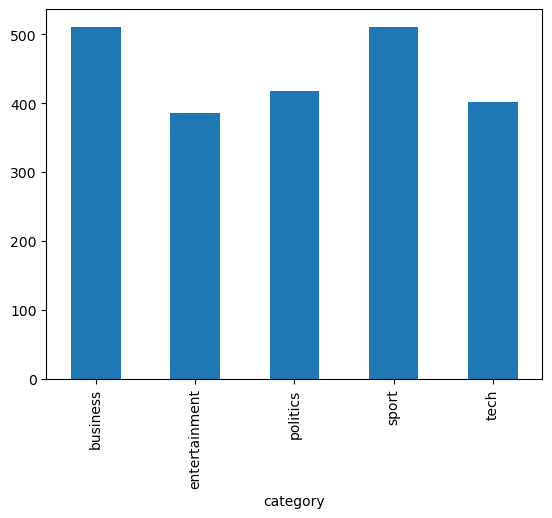

In [6]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

# data preprocessing
takes lot of time

In [ ]:
# df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]

In [7]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Deepika
[nltk_data]     Sainju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
print([stemmer.stem(i) for i in data])
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")
# root word patta lagako
# root word patta lagayo vane tyei root vayeko words lai same manxa

['i', 'am', 'love', 'comput']


'i am love comput'

In [10]:
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("I am loving computing")


'i am love comput'

In [ ]:
# Data Cleaning removing stopwords

In [15]:
news = ''
data = "i am loving computing".split()
for i in data:
  if i not in words:  # i stopwords haina vane news ma save hunxa
    news = news + " " +i
news

' loving computing'

In [16]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']] #a-z ra A-Z bahek sabalai hatako
# .sub()=substitute

df['text'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['text']))
# this is removing stopwords
# df['text'] = [" ".join(word.split() for word in df['text'] if word.lower() not in stopwords.words('english'))]
df

,category,text
1248,sport,sullivan quick hail italians ireland coach edd...
2020,business,ad sales boost time warner profit quarterly pr...
865,entertainment,brits debate urban music joss stone year old s...
238,business,n extends indian beer venture uk biggest brewe...
587,sport,kluft impressed sotherton form olympic heptath...
...,...,...
2117,sport,wales stars need rest ruddock wales coach mike...
610,tech,broadband fuels online expression fast web acc...
2047,business,bombardier chief leave company shares train pl...
1317,politics,labour four little words labour unveiled four ...


In [17]:
df.to_csv('cleaned_bbc_data.csv')

In [ ]:
pwd

In [ ]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [ ]:
# print(words)

In [ ]:
# words = stopwords.words("nepali")
# words

In [ ]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [18]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer() #categorical data lai numerical data ma change gareko jastai nai ho
# string lai xutauxa tespaxi each word lai index(token) dinxa ani token ko adhar ma normalize garera vectorize garxa

X = df['text'] #indepedent 
Y = df['category'] #dependent

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer), #vectorizer = TfidfVectorizer()
                     ('chi',  SelectKBest(chi2, k=2000)), #each news bata 2000 words choose gara vaneko
                     ('clf', LogisticRegression(random_state=1))]) #logistic regression classifier use gara vaneko
# fit garna agadi kun kun steps garne pipeline ley define garxa



# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [19]:
X_test

354     neeson bid revive theatre hollywood film star ...
164     ukip candidate suspended eurosceptic party uki...
1488    low budget film wins cesar film follows group ...
460     monsanto fined bribery us agrochemical giant m...
210     lost doors frontman movie found historians flo...
                              ...                        
100     housewives lift channel ratings debut us telev...
163     musical treatment capra film classic film wond...
1101    talks aim avert pension strike talks aimed ave...
696     yahoo moves desktop search internet giant yaho...
1269    hingis hints playing comeback martina hingis a...
Name: text, Length: 334, dtype: object

In [20]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test) #x_test ma vayeko news ko category predict gareko
print(accuracy_score(y_test,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.9880239520958084


In [22]:
# file = open('news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]} # input news lai dictionary ma change gareko
news_data_df = pd.DataFrame(news_data) # dataframe ma change gareko
# news_data_df
predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = In How to Interpret the Constitution (2023), Harvard law professor Cass Sunstein argues that any theory of constitutional interpretation used by Supreme Court justices must be defensible in terms of beneficial outcomes, to make democracy “better.” Better is subjective, though. Considering the current Supreme Court, “better” begs the obvious question, “Better for whom?”
Predicted news category =  sport


In [25]:
# confusion matrix and classification report(precision, recall, F1-score)
# model kati ko ramro check garna confusion matrix ra classification report use garne
from sklearn.metrics import classification_report, confusion_matrix 
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test))) #predefined function
print(confusion_matrix(model.predict(X_test),ytest))

# business ko support =79 ie total business category 79 wota xa
# confusion matrix ma 78 = ie 1 wota prediction milena (1 misclassify vayo)

               precision    recall  f1-score   support

     business       0.99      0.96      0.97        81
entertainment       0.98      1.00      0.99        52
     politics       1.00      0.98      0.99        61
        sport       0.99      1.00      0.99        81
         tech       0.98      1.00      0.99        59

     accuracy                           0.99       334
    macro avg       0.99      0.99      0.99       334
 weighted avg       0.99      0.99      0.99       334

[[78  0  1  0  0]
 [ 1 52  0  0  0]
 [ 0  0 60  0  0]
 [ 1  0  0 81  0]
 [ 1  0  0  0 59]]


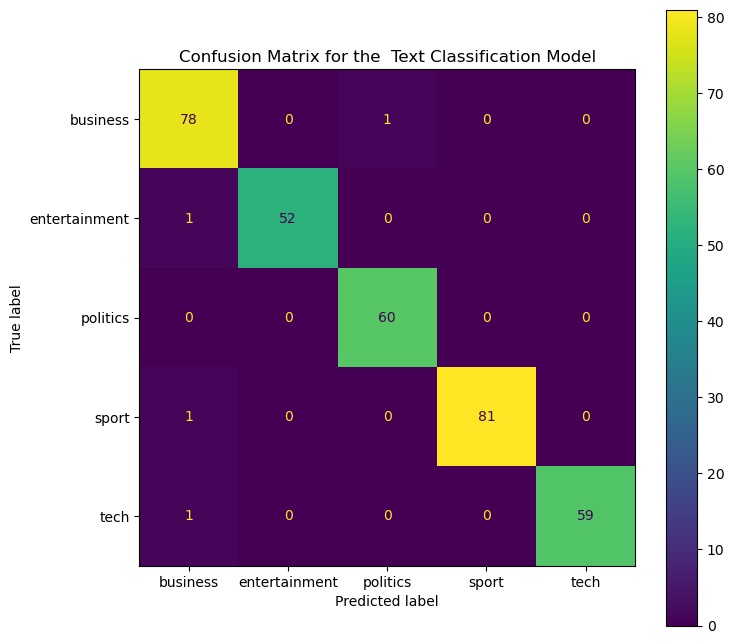

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

# huna parne tech thyo 1 wota business predict garyo
# huna parne sport thyo 1 business predict vayo
# huna parne entertainment thyo 1 business predict vayo
# huna parne business thyo 1 politics predict vayo